### This notebook chooses and then saves the anchor frames to use from the full observation to build the structure from motion maps

In [1]:
import glob
import json
import os
import shutil

import cv2
import pandas as pd

# local .json file with local path info
geladas_root = os.path.dirname(os.getcwd())
local_paths_file = os.path.join(geladas_root, 'local-paths.json')
with open(local_paths_file, "r") as json_file:
    local_paths = json.load(json_file)

import sys
sys.path.append(local_paths['overhead_functions_path'])

from drone_movement import get_anchor_frames_without_log

Will throw error if using functions that require gdal.


In [2]:
observation_name = "DJI_0205"

In [3]:
# This is where the raw video images are saved 
frame_folders_root = os.path.join(local_paths['videos_folder'],
                                  "frames", observation_name)

frame_files = sorted(glob.glob(os.path.join(frame_folders_root, "*.jpg")))

### A new anchor frame is choosen whenever the number of tracked local features in a frame drops below 100

In [4]:
anchor_info, final_warps = get_anchor_frames_without_log(frame_files)

0 of 9022 frames processed.  1 anchors saved.
2000 of 9022 frames processed.  4 anchors saved.
4000 of 9022 frames processed.  7 anchors saved.
6000 of 9022 frames processed.  11 anchors saved.
8000 of 9022 frames processed.  14 anchors saved.


In [5]:
# # Save anchor frames for structure from motion processing
save_folder = os.path.join(local_paths['pix4d_folder'], observation_name,
                          "map-images")
os.makedirs(save_folder, exist_ok=True)
for filename in list(anchor_info['filename']):
    file = os.path.join(frame_folders_root, filename)
    shutil.copy(file, save_folder)
    
anchor_info.to_csv(os.path.join(save_folder, "anchor_frame_info.csv"), index=False)

### Use below code to check quality of warps between anchor frames (these warps are just for checking, won't be used elsewhere in method)

Text(0.5, 1.0, 'No Correction')

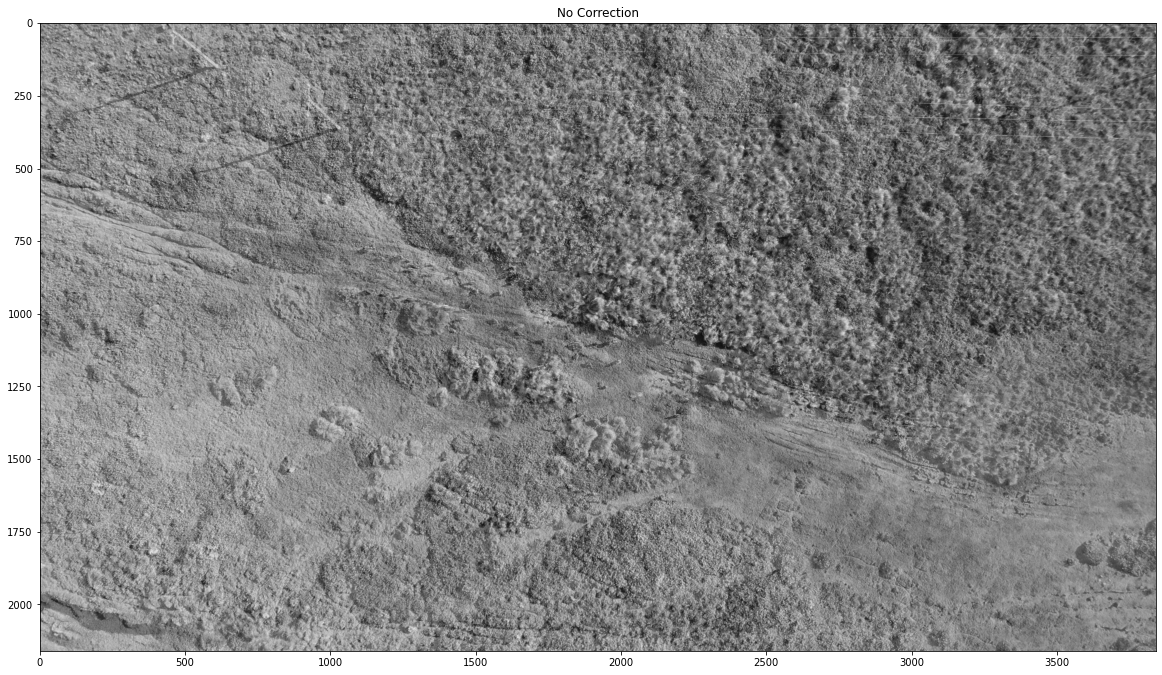

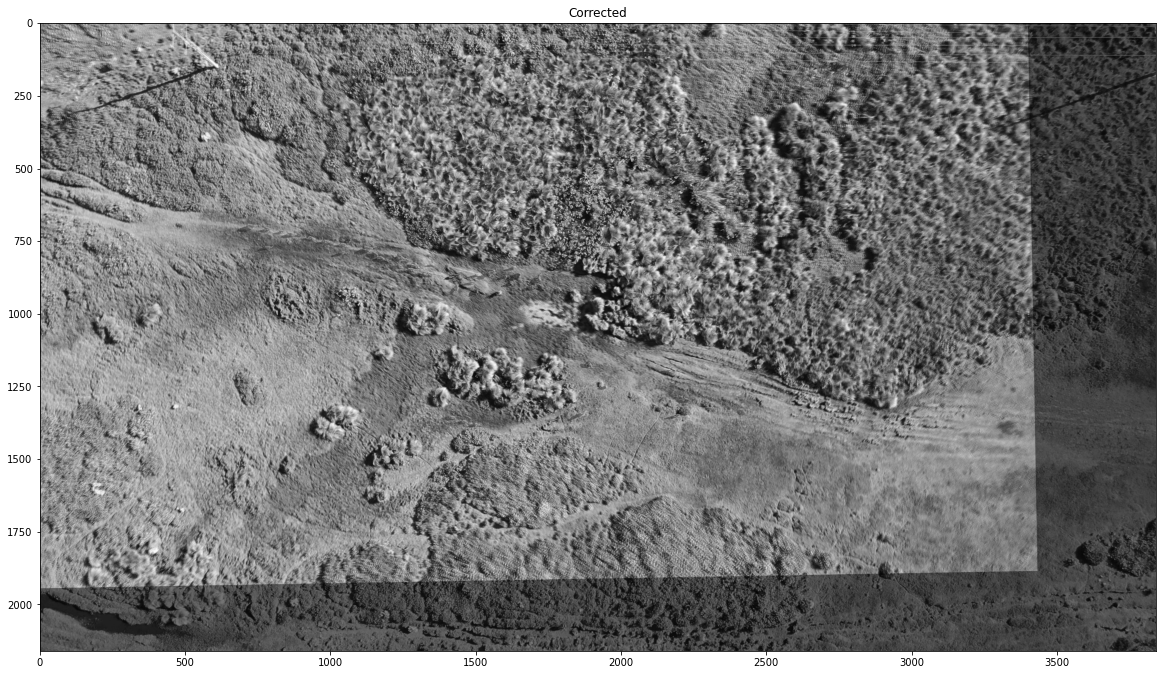

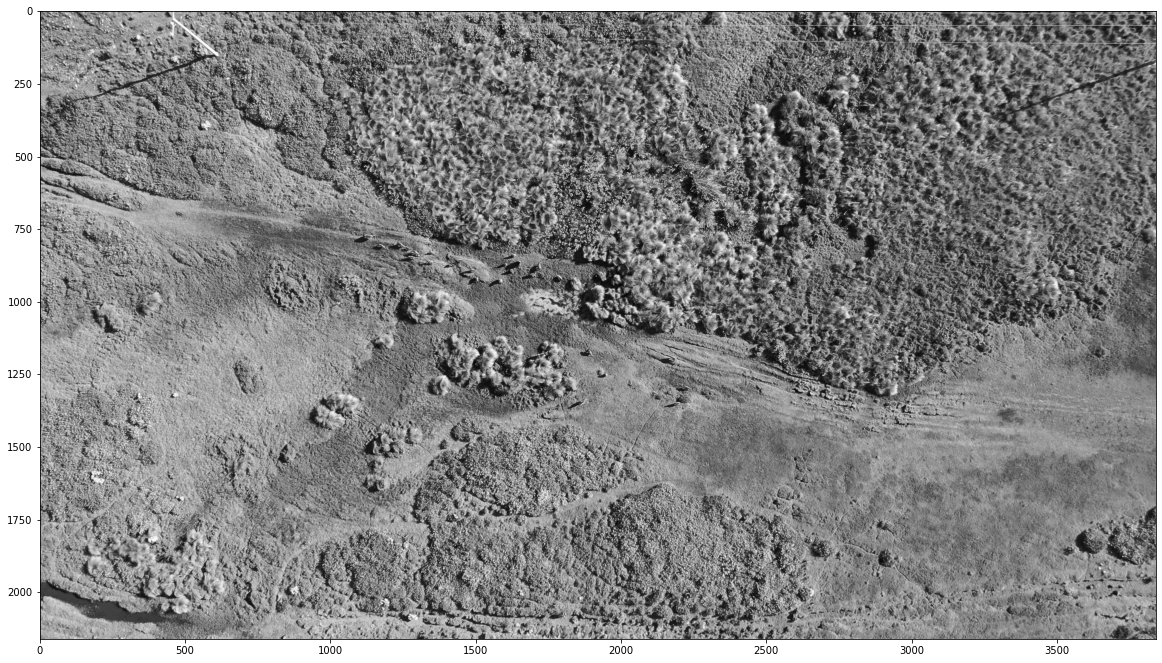

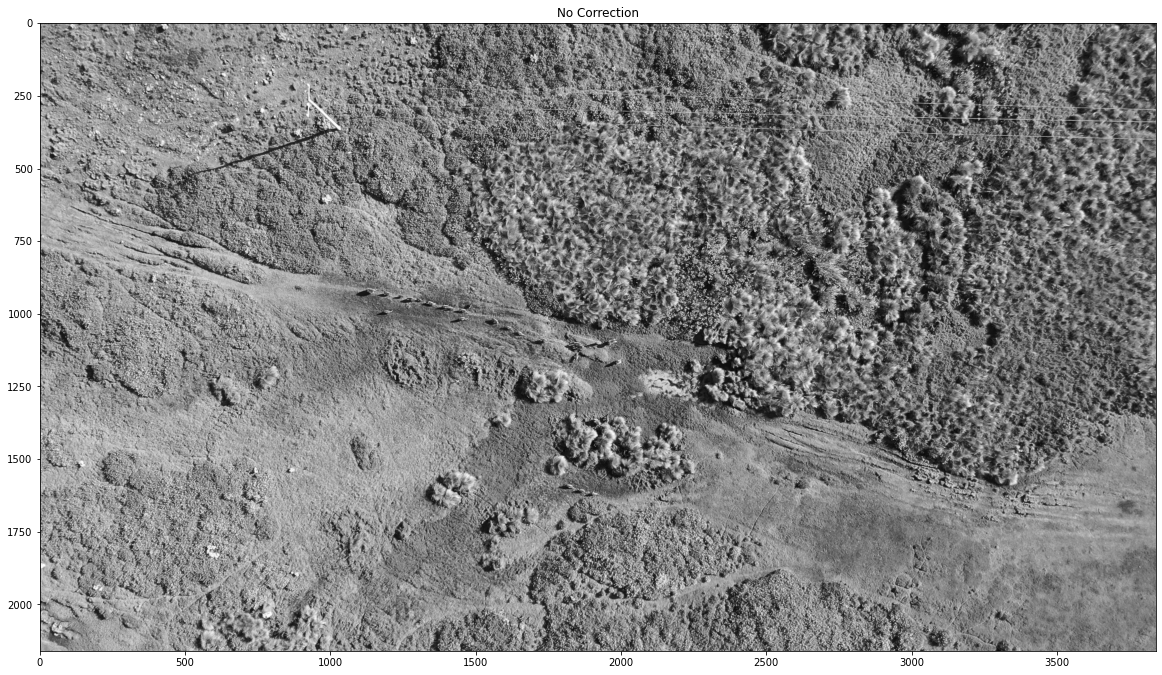

In [8]:
import matplotlib.pyplot as plt
a_ind = 10

anchor_files = [os.path.join(frame_folders_root, f) for f in list(anchor_info['filename'])]

frame0_raw = cv2.imread(anchor_files[a_ind])
frame0_gray = cv2.cvtColor(frame0_raw, cv2.COLOR_BGR2GRAY)

frame1_raw = cv2.imread(anchor_files[a_ind+1])
frame1_gray = cv2.cvtColor(frame1_raw, cv2.COLOR_BGR2GRAY)

warp = final_warps[a_ind]

warped_image = cv2.warpAffine(frame1_gray, M=warp[:2], 
                              dsize=(frame0_raw.shape[1], frame0_raw.shape[0]))

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.imshow(frame1_gray, alpha=.5, cmap='gray')
plt.title("No Correction")

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.imshow(warped_image, alpha=.5, cmap='gray')
plt.title("Corrected")

plt.figure(figsize=(20,20))
plt.imshow(frame0_gray, cmap='gray', )
plt.figure(figsize=(20,20))
plt.imshow(frame1_gray, alpha=1.0, cmap='gray')
plt.title("No Correction")